# Aim: To train & test Decision Tree and Naïve Bayes in Python

In [ ]:
import pandas as pd
df = pd.read_csv('/content/medical_conditions_dataset.csv')
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


In [ ]:
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [ ]:
df.isnull().sum()

,0
id,0
full_name,0
age,4555
gender,0
smoking_status,0
bmi,5348
blood_pressure,6234
glucose_levels,5244
condition,0


In [ ]:
df.shape

(10000, 9)

**DATA CLEANING**

In [ ]:
df_cleaned = df.dropna(subset=['age', 'bmi', 'blood_pressure', 'glucose_levels'], how='all')
print(f"Shape after dropping completely missing rows: {df_cleaned.shape}")

Shape after dropping completely missing rows: (9209, 9)


In [ ]:
# Drop rows where all four key attributes are missing
df_cleaned = df.dropna(subset=['age', 'bmi', 'blood_pressure', 'glucose_levels'], how='all').copy()

# Fill missing values using the grouped median approach
df_cleaned.loc[:, 'age'] = df_cleaned.groupby('condition')['age'].transform(lambda x: x.fillna(x.median()))
df_cleaned.loc[:, 'bmi'] = df_cleaned.groupby('condition')['bmi'].transform(lambda x: x.fillna(x.median()))
df_cleaned.loc[:, 'blood_pressure'] = df_cleaned.groupby('condition')['blood_pressure'].transform(lambda x: x.fillna(x.median()))
df_cleaned.loc[:, 'glucose_levels'] = df_cleaned.groupby('condition')['glucose_levels'].transform(lambda x: x.fillna(x.median()))

# Verify missing values are handled
df_cleaned.isnull().sum()

,0
id,0
full_name,0
age,0
gender,0
smoking_status,0
bmi,0
blood_pressure,0
glucose_levels,0
condition,0


In [ ]:
import numpy as np

# Function to detect and replace outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Replace outliers with median value
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

# Apply outlier handling for the three numerical features
for col in ['bmi', 'blood_pressure', 'glucose_levels']:
    handle_outliers(df_cleaned, col)

# Verify changes
df_cleaned.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,9209.000000,9209.000000,9209.000000,9209.000000,9209.000000
mean,4987.308394,53.489195,27.325160,135.047747,135.853244
std,2889.255671,16.115101,0.294468,0.237141,2.316542
min,2.000000,18.000000,26.051998,133.607466,123.579231
25%,2481.000000,48.000000,27.239140,135.164088,136.505756
50%,4981.000000,54.000000,27.239140,135.164088,136.505756
75%,7500.000000,59.000000,27.239140,135.164088,136.505756
max,10000.000000,89.000000,29.106727,136.096022,145.989320


In [ ]:
df_cleaned.head(10)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
1,2,User0002,30.0,male,Non-Smoker,27.239140,135.164088,136.505756,Diabetic
2,3,User0003,18.0,male,Non-Smoker,27.239140,134.536675,134.899292,Pneumonia
3,4,User0004,54.0,male,Non-Smoker,27.346625,135.164088,134.899292,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,27.239140,135.164088,136.505756,Diabetic
5,6,User0006,40.0,male,Non-Smoker,27.239140,135.164088,136.505756,Diabetic
6,7,User0007,49.0,male,Smoker,27.959845,134.952905,136.505756,Cancer
7,8,User0008,47.0,male,Non-Smoker,27.239140,135.164088,136.505756,Diabetic
8,9,User0009,54.0,male,Non-Smoker,27.239140,135.164088,136.505756,Diabetic
9,10,User0010,65.0,male,Smoker,27.239140,135.164088,136.505756,Diabetic
10,11,User0011,54.0,female,Non-Smoker,27.346625,134.536675,136.505756,Pneumonia


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode target variable (condition)
label_encoder = LabelEncoder()
df_cleaned['condition'] = label_encoder.fit_transform(df_cleaned['condition'])

# One-hot encode categorical features
df_cleaned = pd.get_dummies(df_cleaned, columns=['gender', 'smoking_status'], drop_first=True)

In [ ]:
df_cleaned.head(10)

,id,full_name,age,bmi,blood_pressure,glucose_levels,condition,gender_male,smoking_status_Smoker
1,2,User0002,30.0,27.239140,135.164088,136.505756,1,True,False
2,3,User0003,18.0,27.239140,134.536675,134.899292,2,True,False
3,4,User0004,54.0,27.346625,135.164088,134.899292,2,True,False
4,5,User0005,76.0,27.239140,135.164088,136.505756,1,True,False
5,6,User0006,40.0,27.239140,135.164088,136.505756,1,True,False
6,7,User0007,49.0,27.959845,134.952905,136.505756,0,True,True
7,8,User0008,47.0,27.239140,135.164088,136.505756,1,True,False
8,9,User0009,54.0,27.239140,135.164088,136.505756,1,True,False
9,10,User0010,65.0,27.239140,135.164088,136.505756,1,True,True
10,11,User0011,54.0,27.346625,134.536675,136.505756,2,False,False


"Cancer" → 0 , "Diabetic" → 1, "Pneumonia" → 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for normalization
num_features = ['age', 'bmi', 'blood_pressure', 'glucose_levels']

scaler = MinMaxScaler()

# Applying Min-Max Scaling
df_cleaned[num_features] = scaler.fit_transform(df_cleaned[num_features])

df_cleaned.describe()

,id,age,bmi,blood_pressure,glucose_levels,condition
count,9209.000000,9209.000000,9209.000000,9209.000000,9209.000000,9209.000000
mean,4987.308394,0.499848,0.416784,0.578762,0.547700,1.105440
std,2889.255671,0.226973,0.096397,0.095293,0.103370,0.622889
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2481.000000,0.422535,0.388625,0.625512,0.576817,1.000000
50%,4981.000000,0.507042,0.388625,0.625512,0.576817,1.000000
75%,7500.000000,0.577465,0.388625,0.625512,0.576817,2.000000
max,10000.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# Data Reduction - Selecting Relevant Features
features_to_keep = ['age', 'bmi', 'blood_pressure', 'glucose_levels', 'gender_male', 'smoking_status_Smoker', 'condition']
df_reduced = df_cleaned[features_to_keep]
df_4 = df_reduced.copy()
# Check the reduced dataset
df_reduced.head()

,age,bmi,blood_pressure,glucose_levels,gender_male,smoking_status_Smoker,condition
1,0.169014,0.388625,0.625512,0.576817,True,False,1
2,0.000000,0.388625,0.373393,0.505132,True,False,2
3,0.507042,0.423811,0.625512,0.505132,True,False,2
4,0.816901,0.388625,0.625512,0.576817,True,False,1
5,0.309859,0.388625,0.625512,0.576817,True,False,1


# Classification

"Cancer" → 0 , "Diabetic" → 1, "Pneumonia" → 2

In [ ]:
df_4.head()

,age,bmi,blood_pressure,glucose_levels,gender_male,smoking_status_Smoker,condition
1,0.169014,0.388625,0.625512,0.576817,True,False,1
2,0.000000,0.388625,0.373393,0.505132,True,False,2
3,0.507042,0.423811,0.625512,0.505132,True,False,2
4,0.816901,0.388625,0.625512,0.576817,True,False,1
5,0.309859,0.388625,0.625512,0.576817,True,False,1


**setp 1: Define features (X) and target variable (y)**

In [ ]:
# Define features (X) and target variable (y)
X = df_4[['age', 'bmi', 'blood_pressure', 'glucose_levels', 'gender_male', 'smoking_status_Smoker']]
y = df_4['condition']

In [ ]:
X.head(1)

,age,bmi,blood_pressure,glucose_levels,gender_male,smoking_status_Smoker
1,0.169014,0.388625,0.625512,0.576817,True,False


In [ ]:
y.head(1)

,condition
1,1


**step 2: Splitting the Dataset into Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7367, 6) (7367,)
Testing set shape: (1842, 6) (1842,)


**step 3: Implementing Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Display classification report
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9473398479913138
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       270
           1       0.94      0.98      0.96      1107
           2       0.99      0.90      0.94       465

    accuracy                           0.95      1842
   macro avg       0.95      0.92      0.94      1842
weighted avg       0.95      0.95      0.95      1842



**step 4: Implementing Naïve Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Accuracy:", accuracy_nb)

# Display classification report
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.8072747014115093
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       270
           1       0.82      0.93      0.87      1107
           2       0.85      0.58      0.69       465

    accuracy                           0.81      1842
   macro avg       0.79      0.73      0.75      1842
weighted avg       0.81      0.81      0.80      1842



**step 5: Comparing Results & Observations**

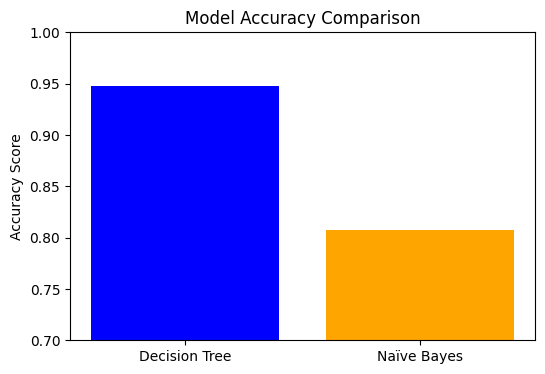

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from Classification Reports
accuracy_dt = 0.9473
accuracy_nb = 0.8073

# Macro Average Scores
precision_dt, recall_dt, f1_dt = 0.95, 0.92, 0.94
precision_nb, recall_nb, f1_nb = 0.79, 0.73, 0.75

# Per-Class Scores
classes = ['Cancer (0)', 'Diabetic (1)', 'Pneumonia (2)']
precision_scores = [[0.93, 0.94, 0.99], [0.69, 0.82, 0.85]]
recall_scores = [[0.90, 0.98, 0.90], [0.67, 0.93, 0.58]]
f1_scores = [[0.91, 0.96, 0.94], [0.68, 0.87, 0.69]]

# Bar width and positions
bar_width = 0.4
x = np.arange(len(classes))

# 📊 Accuracy Comparison
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Naïve Bayes'], [accuracy_dt, accuracy_nb], color=['blue', 'orange'])
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1)
plt.show()

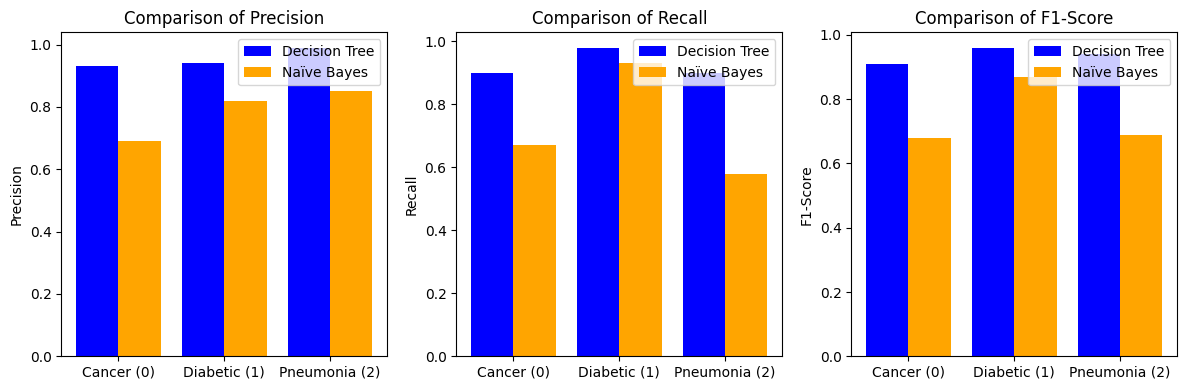

In [ ]:
# 📊 Precision, Recall, and F1-Score per Class
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, (metric, scores) in enumerate(zip(['Precision', 'Recall', 'F1-Score'], [precision_scores, recall_scores, f1_scores])):
    axes[i].bar(x - bar_width / 2, scores[0], bar_width, label='Decision Tree', color='blue')
    axes[i].bar(x + bar_width / 2, scores[1], bar_width, label='Naïve Bayes', color='orange')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].legend()

plt.tight_layout()
plt.show()

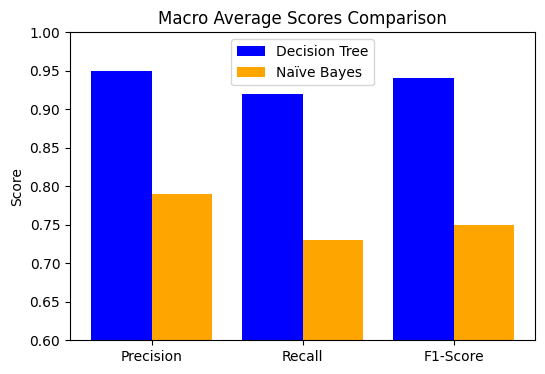

In [ ]:



# 📊 Macro Average Scores
metrics = ['Precision', 'Recall', 'F1-Score']
dt_values = [precision_dt, recall_dt, f1_dt]
nb_values = [precision_nb, recall_nb, f1_nb]

plt.figure(figsize=(6, 4))
plt.bar(np.arange(len(metrics)) - bar_width / 2, dt_values, bar_width, label='Decision Tree', color='blue')
plt.bar(np.arange(len(metrics)) + bar_width / 2, nb_values, bar_width, label='Naïve Bayes', color='orange')
plt.xticks(np.arange(len(metrics)), metrics)
plt.ylabel('Score')
plt.title('Macro Average Scores Comparison')
plt.ylim(0.6, 1)
plt.legend()
plt.show()


**📊 Observations from Graphs:**

1️⃣ Accuracy

Decision Tree (94.7%) is significantly better than Naïve Bayes (80.7%).

2️⃣ Class-wise Precision, Recall, and F1-Score

Decision Tree performs consistently well across all classes, while Naïve Bayes struggles with Pneumonia (Class 2) (Lower Recall: 0.58).

Naïve Bayes has high recall for Diabetic cases (0.93), meaning it captures most true positives but has lower precision.

3️⃣ Macro Average Scores

Decision Tree has higher precision, recall, and F1-score, indicating overall better performance.


**Conclusion:**

✅ Decision Tree outperforms Naïve Bayes in all metrics.

✅ Naïve Bayes works well for Diabetic cases but struggles with Pneumonia classification.

✅ Decision Tree is a better choice for this dataset due to its balanced performance.